# **Introduction**

**Major steps to complete this project:-**

### 1) Data Collection or acquistion
### 2) Data Exploration
### 3) About Features 
   > ### 3.1) Feature scaling
   > ### 3.2) Feature Extraction
   > ### 3.3) Feature selection
### 4) Model bulding
### 5) Model Evaluation
### 6) Model accuracy Visualization



In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', -1)

# Description about features of this dataset

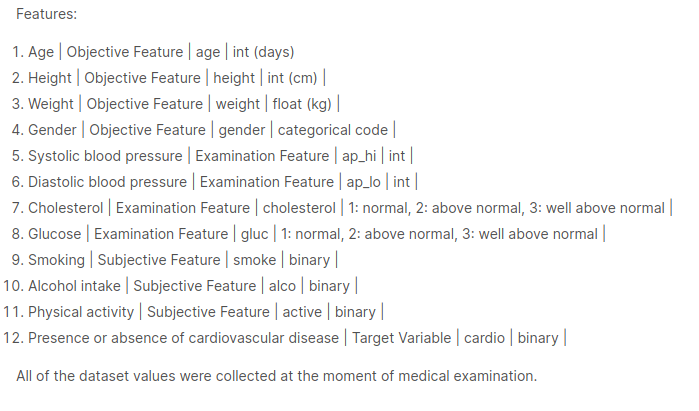

# Data acquistion

In [2]:
#read training data and testing data from csv files 
df = pd.read_csv("cardio_train.csv",sep=';')
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [3]:
df.tail(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69990,99986,15094,1,168,72.0,110,70,1,1,0,0,1,1
69991,99988,20609,1,159,72.0,130,90,2,2,0,0,1,0
69992,99990,18792,1,161,56.0,170,90,1,1,0,0,1,1
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


# Data Exploration

In [4]:
# train data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.dtypes

id             int64  
age            int64  
gender         int64  
height         int64  
weight         float64
ap_hi          int64  
ap_lo          int64  
cholesterol    int64  
gluc           int64  
smoke          int64  
alco           int64  
active         int64  
cardio         int64  
dtype: object

In [7]:
#look for ant null values in the train data for each column
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# See all unique values for every feature

In [8]:
for i in df.columns:
    print(i,df[i].unique())
    print()

id [    0     1     2 ... 99996 99998 99999]

age [18393 20228 18857 ... 14925 17727 17926]

gender [2 1]

height [168 156 165 169 151 157 178 158 164 173 181 172 170 154 162 163 153 159
 166 155 160 175 171 152 187 148 179 180 188 185 167 183 174 176 161 184
 177 182  76 149 142 150 144 147 186 146 141 195 140 198 145 143 196 138
 194 190 134 136 100 120 189 137 192 122 250 191 117  70  97 119 130 110
 193  75 132  71 135  67 125 139 133  74  98 112 207  68  55  81  80  64
  91  60 109  72 197  65 128 105 108 200 104 111 113  96 131  59  66  99
  57]

weight [ 62.    85.    64.    82.    56.    67.    93.    95.    71.    68.
  80.    60.    78.   112.    75.    52.    83.    69.    90.    45.
  65.    59.    66.    74.   105.    73.    55.    70.    72.    63.
  50.   107.    84.    77.    79.    76.    58.   115.    97.    53.
  57.    49.   110.    94.    92.    87.   103.    88.    99.   100.
  61.    48.    54.    51.    47.    91.   104.    81.    98.   108.
  89.   101.    86. 

# Data visualization

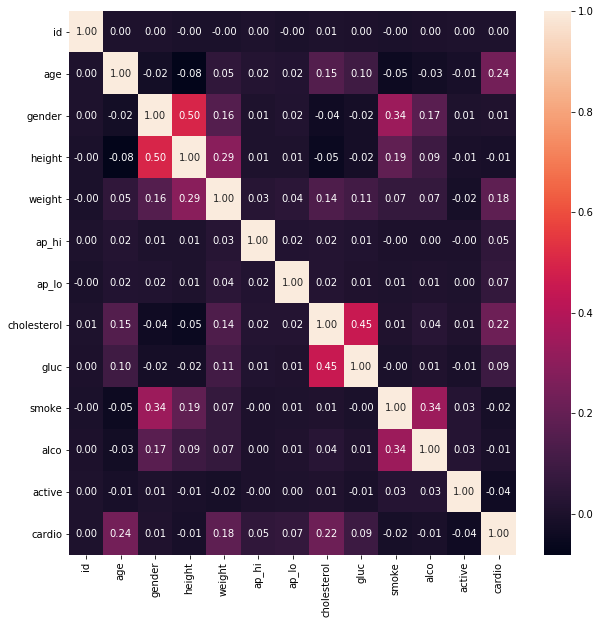

In [9]:
#correlation matrix of train data
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".2f")

In [10]:
# Age column has the values in the form of days,we have to convert the days into years
df["Age"] = (df["age"]/365).round(0)
df["sex"] = df['gender'].apply({1:'female', 2:'male'}.get)

In [11]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age,sex
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,male
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,female
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0,female
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,male
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0,female


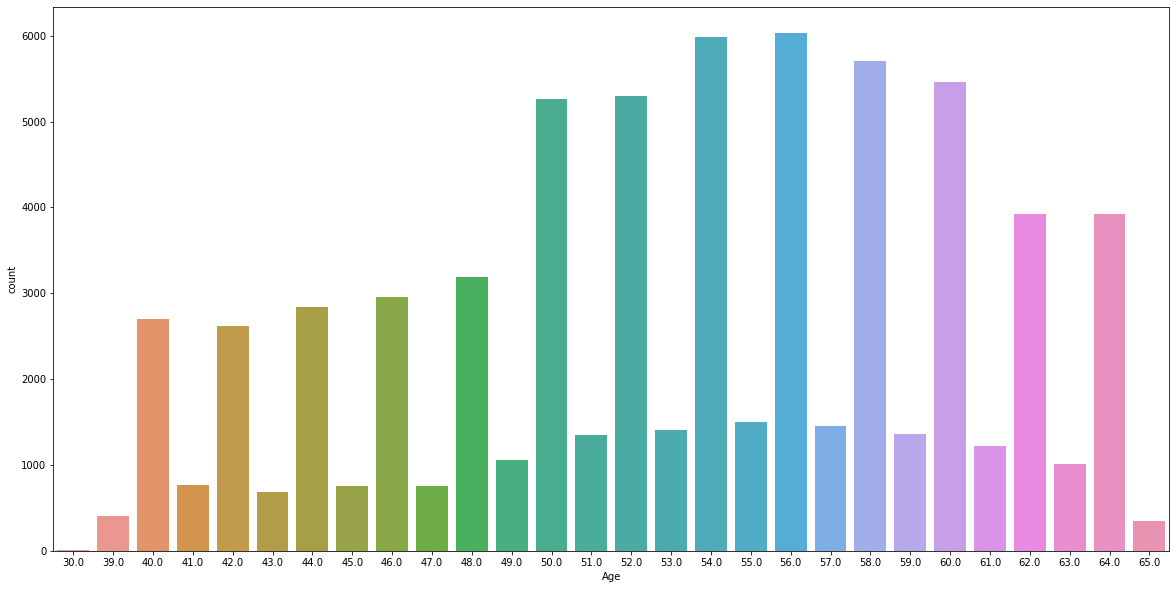

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(x="Age",data = df)

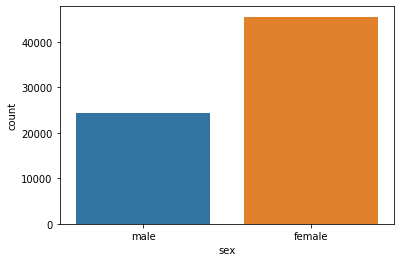

In [13]:
sns.countplot(x='sex',data=df)

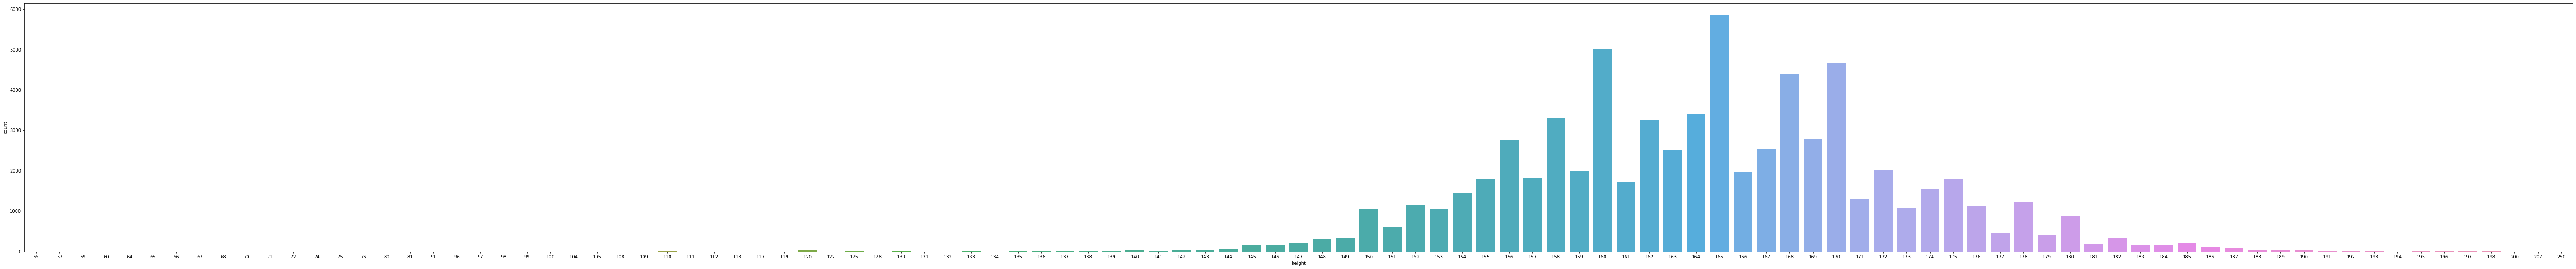

In [14]:
plt.figure(figsize=(100,10))
sns.countplot(x='height',data=df)

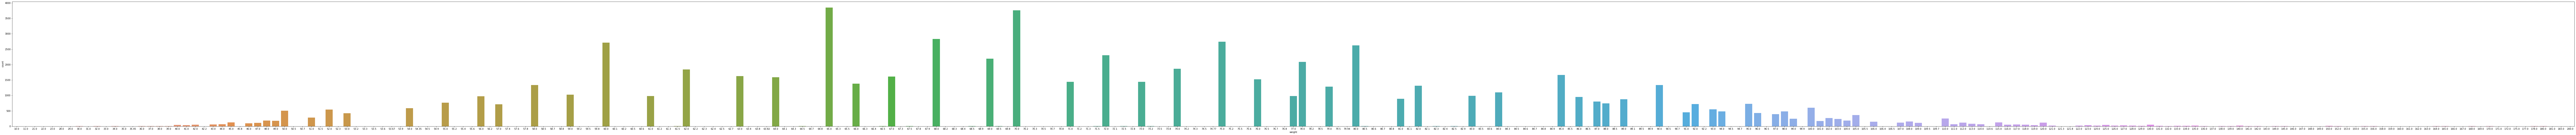

In [15]:
plt.figure(figsize=(200,10))
sns.countplot(x='weight',data=df)

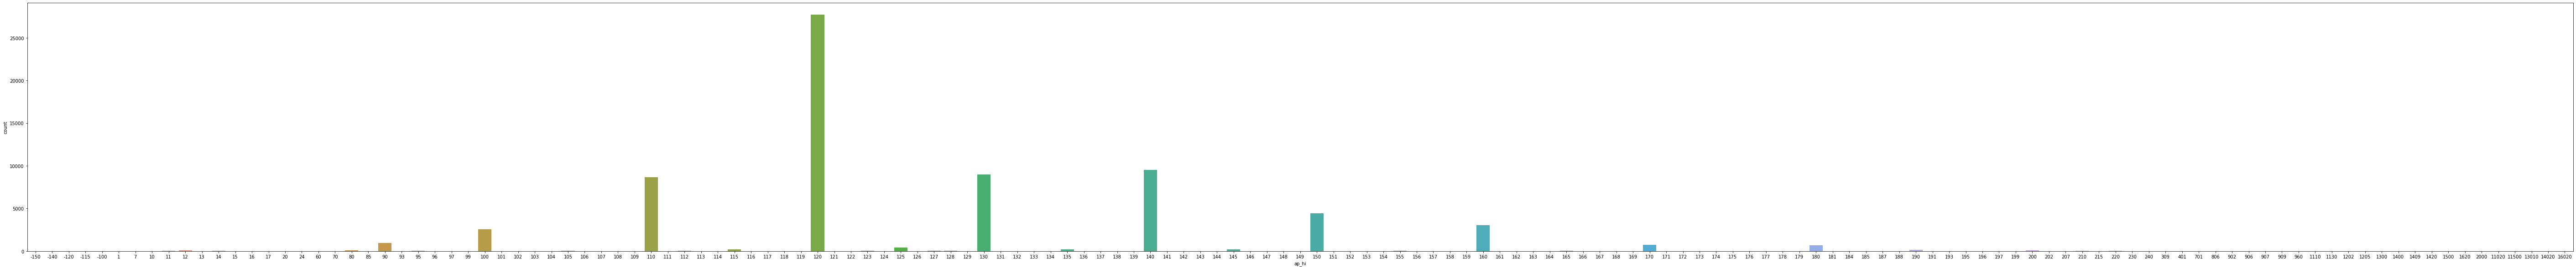

In [16]:
plt.figure(figsize=(100,10))
sns.countplot(x='ap_hi',data=df)

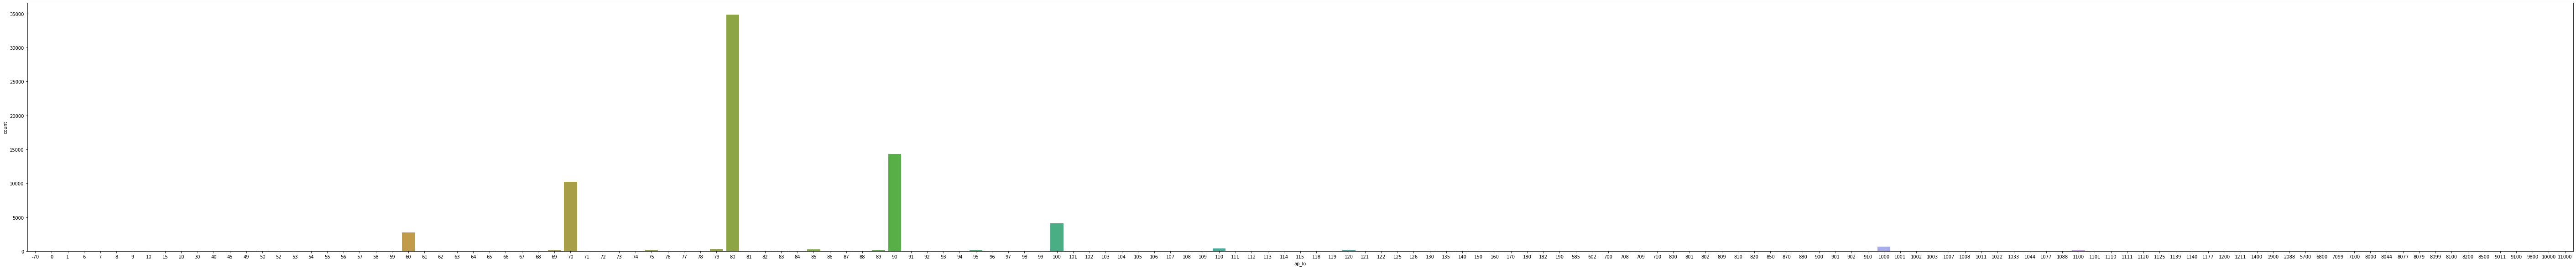

In [17]:
plt.figure(figsize=(100,10))
sns.countplot(x='ap_lo',data=df)

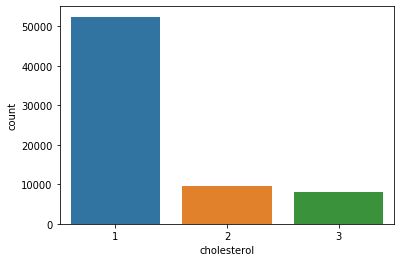

In [18]:
sns.countplot(x='cholesterol',data=df)

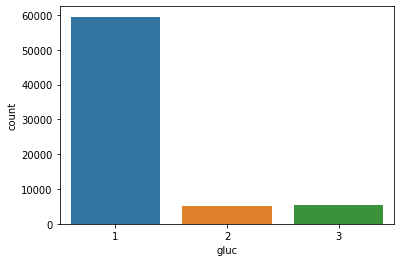

In [19]:
sns.countplot(x='gluc',data=df)

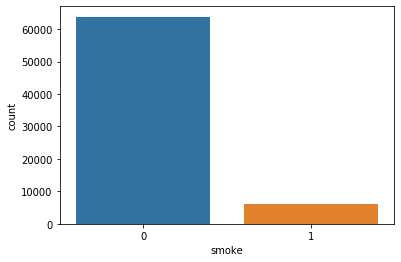

In [20]:
sns.countplot(x='smoke',data=df)

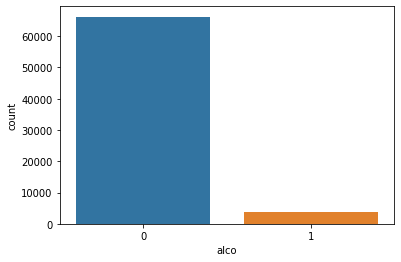

In [21]:
sns.countplot(x='alco',data=df)

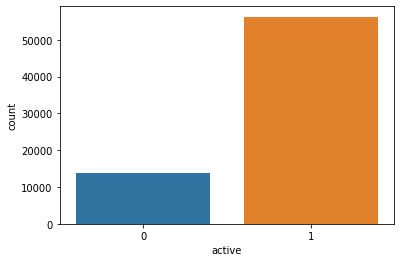

In [22]:
sns.countplot(x='active',data=df)

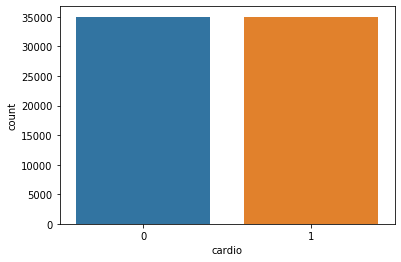

In [23]:
sns.countplot(x='cardio',data=df)

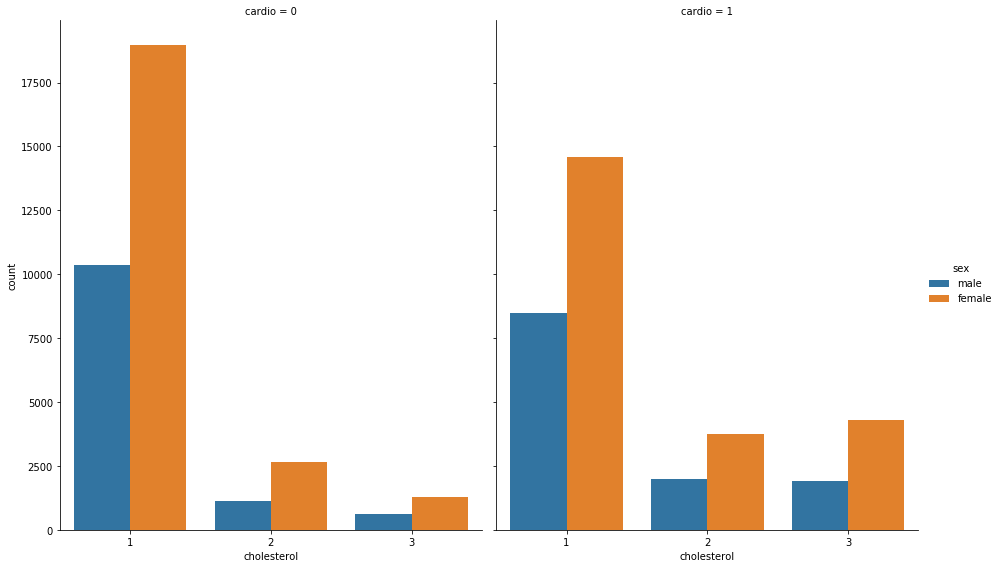

In [24]:
sns.catplot(x="cholesterol", hue="sex", col="cardio",data=df, kind="count",height=8, aspect=.8)

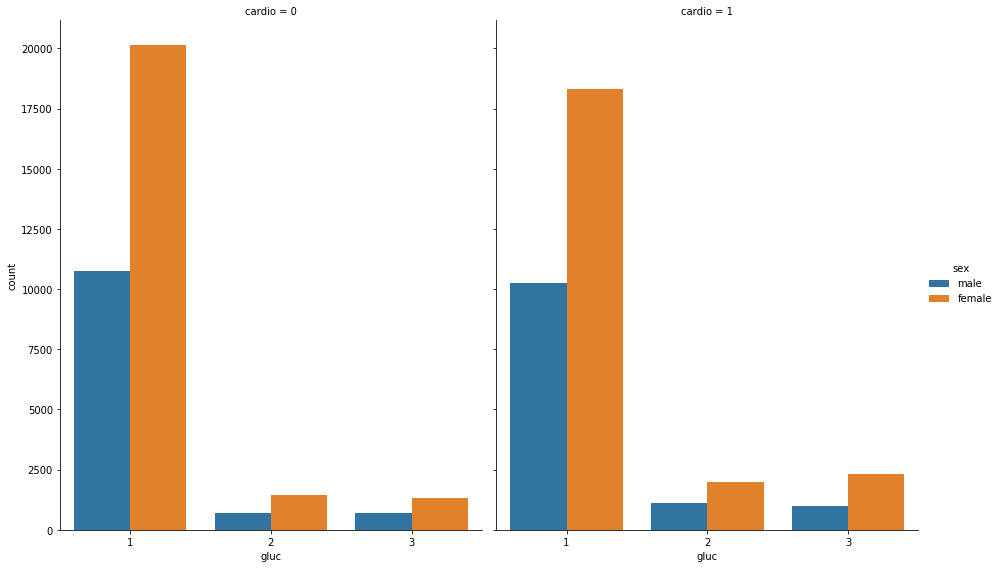

In [25]:
sns.catplot(x="gluc", hue="sex", col="cardio",data=df, kind="count",height=8, aspect=.8)

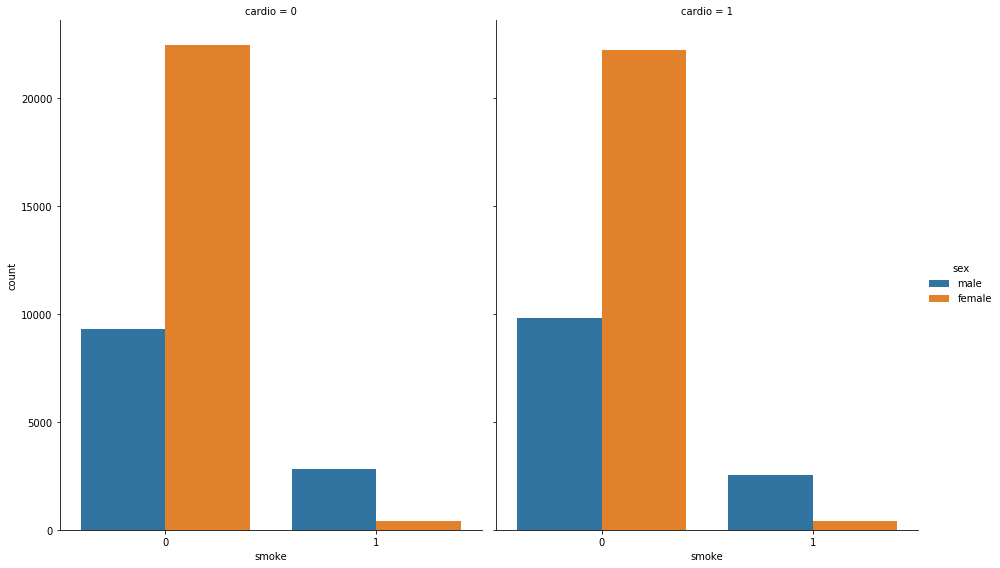

In [26]:
sns.catplot(x="smoke", hue="sex", col="cardio",data=df, kind="count",height=8, aspect=.8)

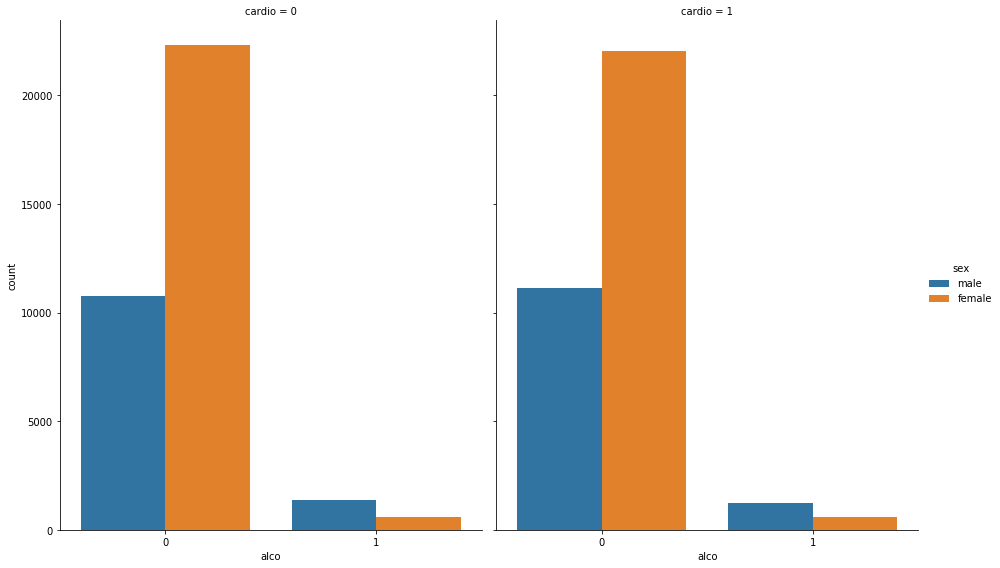

In [27]:
sns.catplot(x="alco", hue="sex", col="cardio",data=df, kind="count",height=8, aspect=.8)

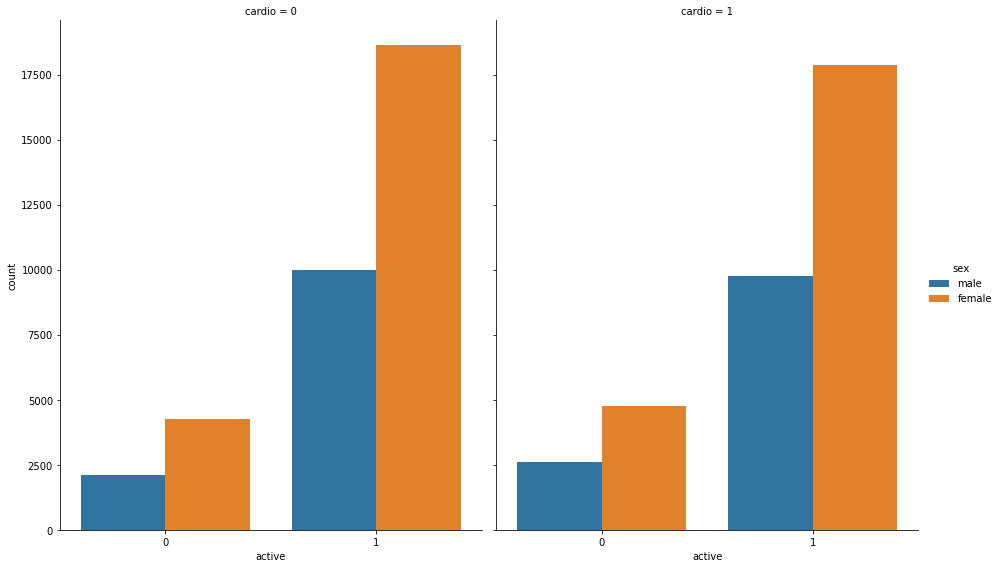

In [28]:
sns.catplot(x="active", hue="sex", col="cardio",data=df, kind="count",height=8, aspect=.8)

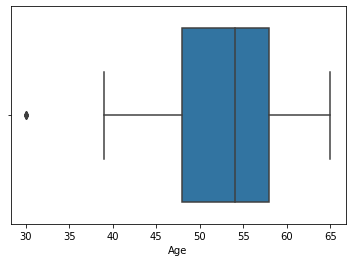

In [29]:
sns.boxplot(x='Age',data=df)

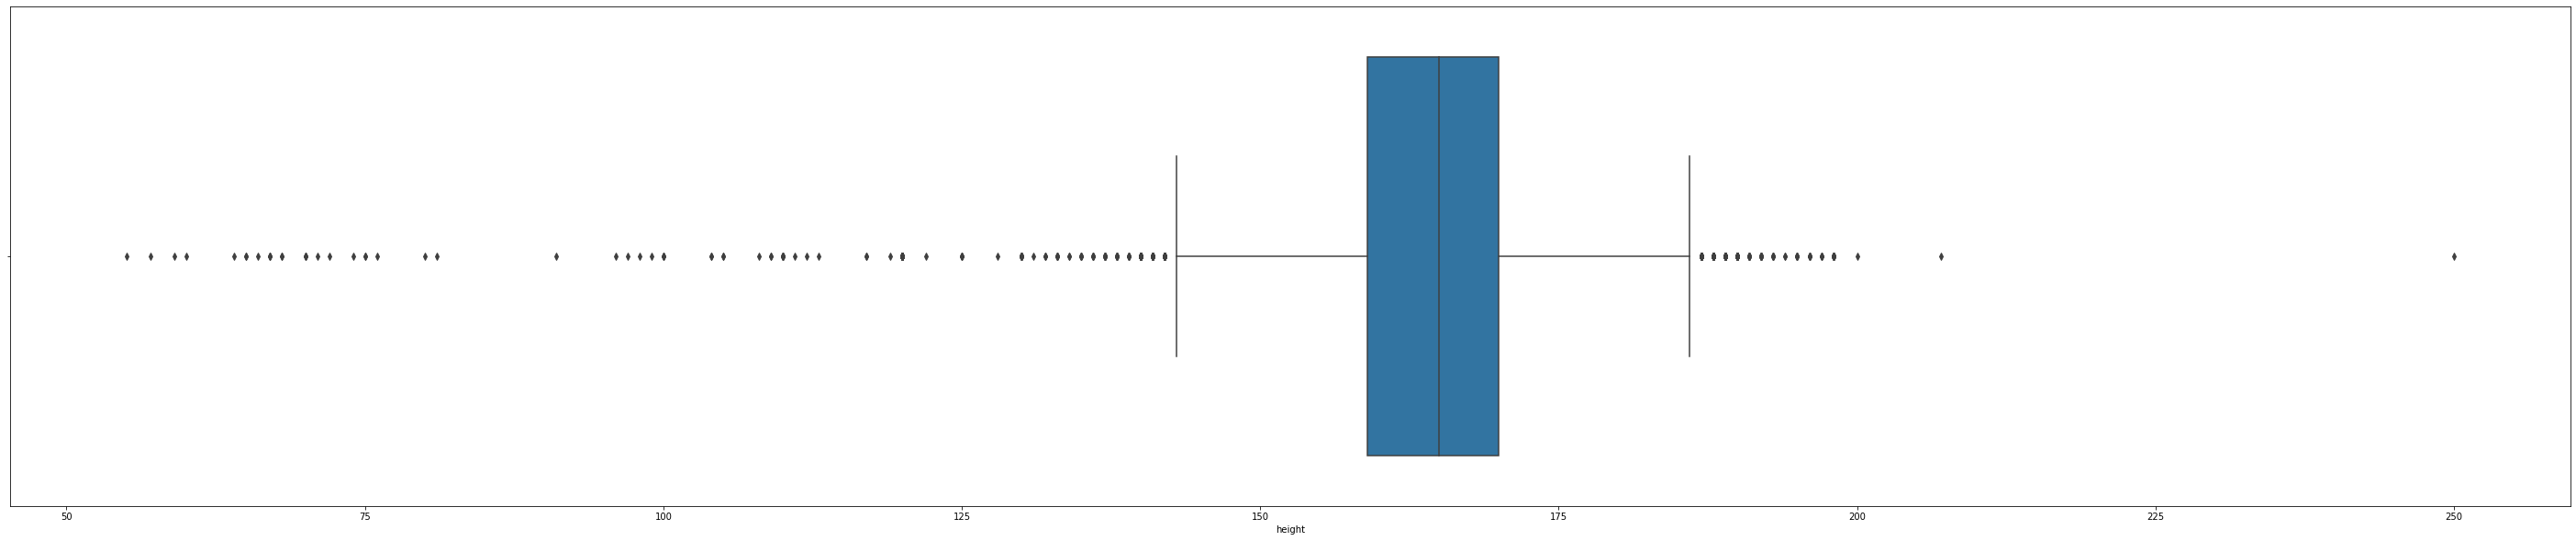

In [30]:
plt.figure(figsize=(50,10))
sns.boxplot(x='height',data=df)

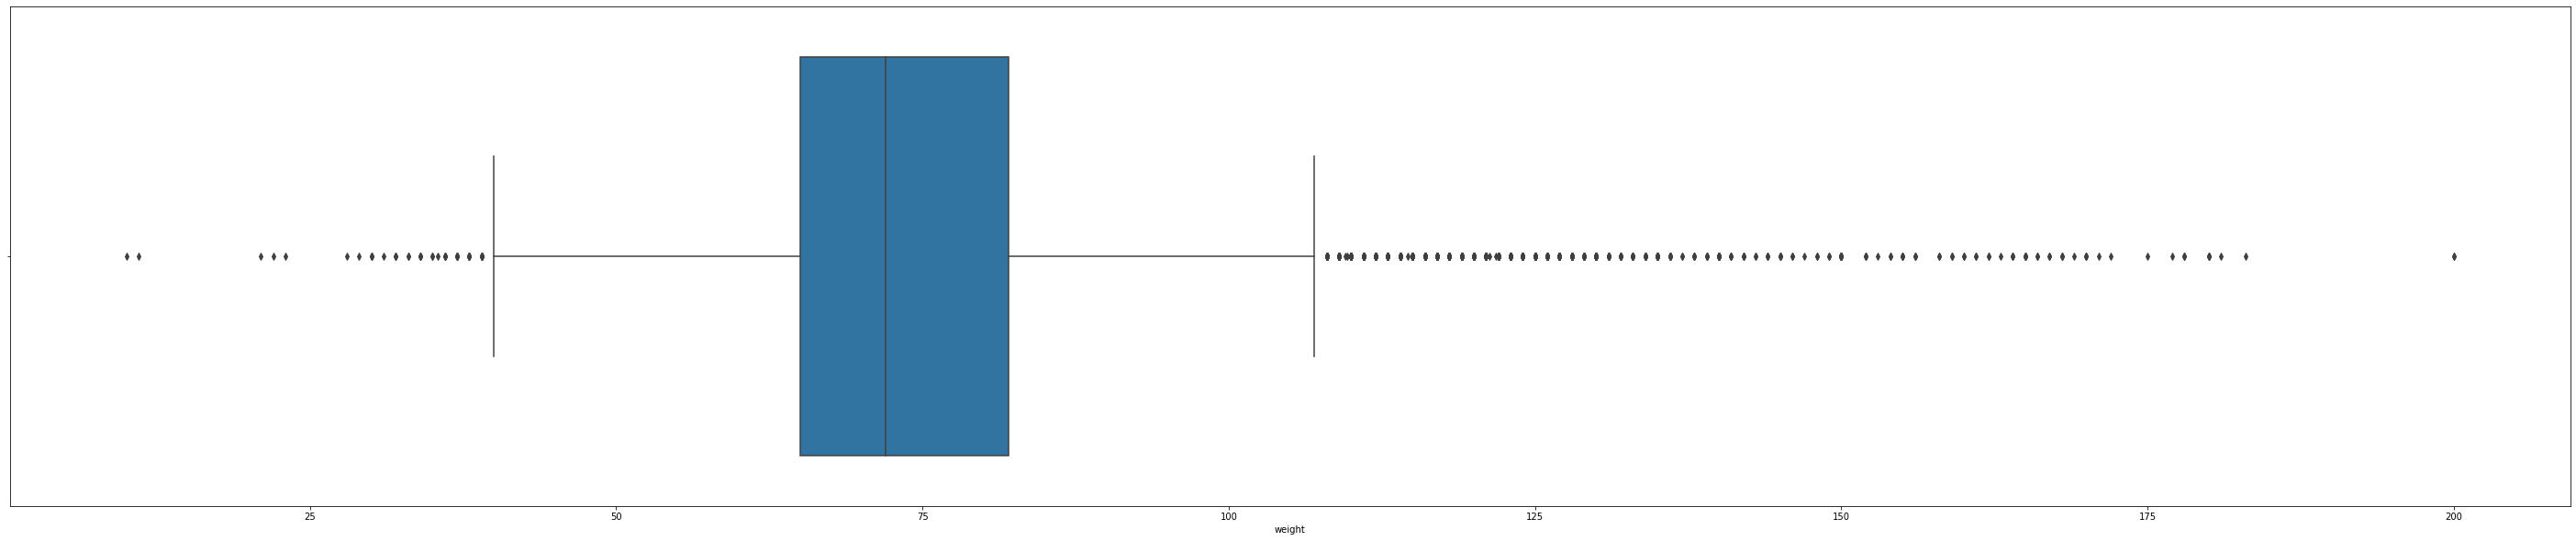

In [31]:
plt.figure(figsize=(50,10))
sns.boxplot(x='weight',data=df)

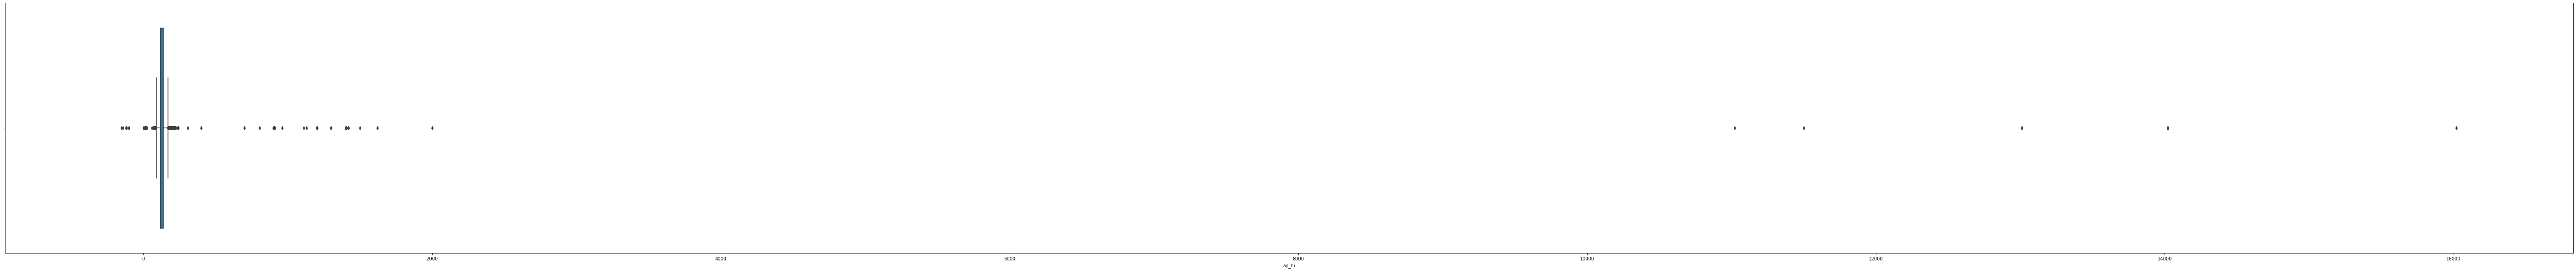

In [32]:
plt.figure(figsize=(100,10))
sns.boxplot(x='ap_hi',data=df)

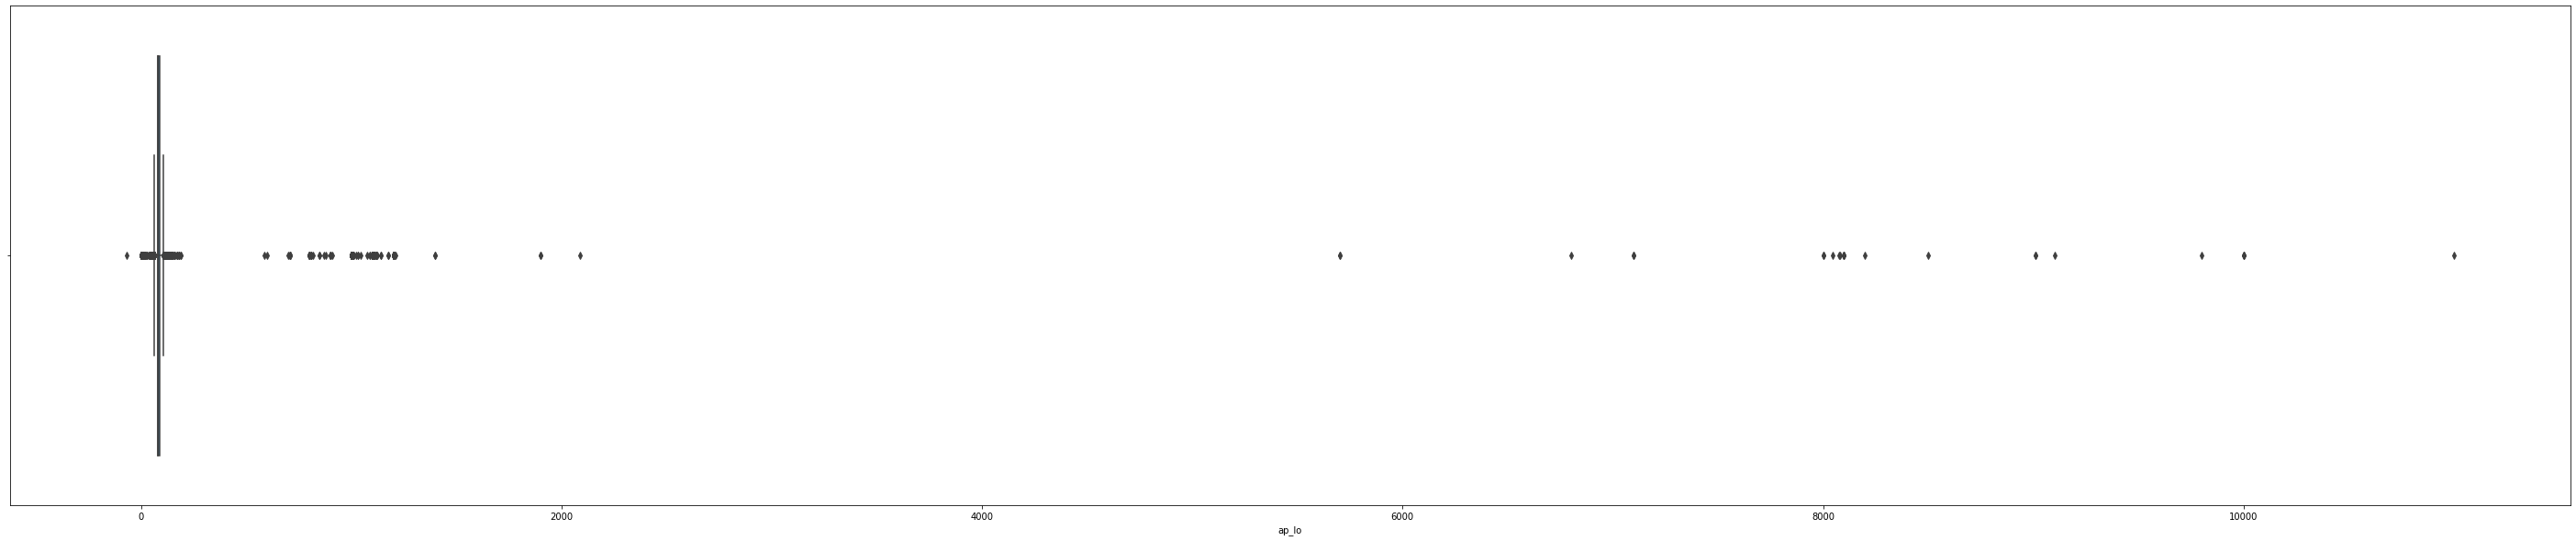

In [33]:
plt.figure(figsize=(50,10))
sns.boxplot(x='ap_lo',data=df)

In [34]:
total_data = df.copy()

In [35]:
total_data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age,sex
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,male
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,female
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0,female
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,male
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0,female
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,60.0,female
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,61.0,female
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,62.0,male
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,48.0,female
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,54.0,female


# Data preprocessing

In [36]:
total_data = total_data.drop(["id","age","sex"],axis=1)

In [37]:
total_data = total_data[["Age","gender","height","weight","ap_hi","ap_lo","cholesterol","gluc","smoke","active","cardio"]]
total_data.head()

,Age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0


In [38]:
X = total_data.iloc[:,0:-1].values
y = total_data.iloc[:,-1].values.reshape(-1,1)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(46900, 10)
(23100, 10)
(46900, 1)
(23100, 1)


In [41]:
X_train

array([[ 60.,   2., 156., ...,   1.,   0.,   1.],
       [ 56.,   1., 159., ...,   1.,   0.,   0.],
       [ 56.,   2., 170., ...,   1.,   0.,   1.],
       ...,
       [ 65.,   1., 169., ...,   1.,   0.,   1.],
       [ 50.,   1., 167., ...,   1.,   0.,   0.],
       [ 41.,   2., 177., ...,   1.,   0.,   1.]])

In [42]:
y_train

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

# 1) Max Logistic classifier model

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
yhat1 = lr.predict(X_test)
yhat1

array([1, 1, 1, ..., 1, 1, 0])

In [45]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,yhat1)
cm1

array([[8613, 2893],
       [3837, 7757]])

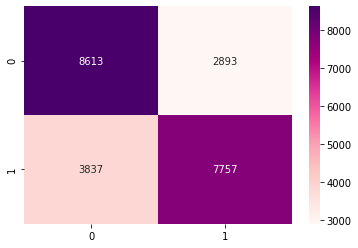

In [46]:
sns.heatmap(cm1, annot=True, fmt="d",cmap="RdPu")

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, 
                            yhat1, 
                            target_names=['No cardio', 'cardio']))

              precision    recall  f1-score   support

   No cardio       0.69      0.75      0.72     11506
      cardio       0.73      0.67      0.70     11594

    accuracy                           0.71     23100
   macro avg       0.71      0.71      0.71     23100
weighted avg       0.71      0.71      0.71     23100



In [48]:
from sklearn.metrics import accuracy_score
ac1 = (accuracy_score(y_test,yhat1)*100).round(0)
ac1

71.0

# **2) Random Forest Model**

In [49]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=2,criterion='entropy',max_depth=2, random_state=0)

In [50]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [51]:
yhat2 = lr.predict(X_test)
yhat2

array([1, 1, 1, ..., 1, 1, 0])

In [52]:
cm2 = confusion_matrix(y_test,yhat2)
cm2

array([[8613, 2893],
       [3837, 7757]])

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, 
                            yhat2, 
                            target_names=['No cardio', 'cardio']))

              precision    recall  f1-score   support

   No cardio       0.69      0.75      0.72     11506
      cardio       0.73      0.67      0.70     11594

    accuracy                           0.71     23100
   macro avg       0.71      0.71      0.71     23100
weighted avg       0.71      0.71      0.71     23100



In [54]:
from sklearn.metrics import accuracy_score
ac2 = (accuracy_score(y_test,yhat2)*100).round(0)
ac2

71.0

# **By droppping some unneccesary columns in the dataset,we can improve the accuracy**

In [55]:
total_data1 = df.copy()

In [56]:
total_data1.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age,sex
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,male
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,female
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0,female
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,male
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0,female


In [57]:
total_data1.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


In [58]:
total_data1 = total_data1.drop(["id","age","sex","gender","height","ap_hi","ap_lo","smoke","gluc","alco","active"],axis=1)

In [59]:
total_data1.head()

,weight,cholesterol,cardio,Age
0,62.0,1,0,50.0
1,85.0,3,1,55.0
2,64.0,3,1,52.0
3,82.0,1,1,48.0
4,56.0,1,0,48.0


In [60]:
total_data1 = total_data1[["Age","weight","cholesterol","cardio"]]

In [61]:
Xtotal = total_data1.iloc[:,0:-1].values
ytotal = total_data1.iloc[:,-1].values.reshape(-1,1)

In [62]:
print(Xtotal.shape)
print(ytotal.shape)

(70000, 3)
(70000, 1)


In [63]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xtotal, ytotal, test_size=0.33, random_state=42)

In [64]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(46900, 3)
(23100, 3)
(46900, 1)
(23100, 1)


In [65]:
X_train1

array([[60., 60.,  1.],
       [56., 60.,  1.],
       [56., 90.,  2.],
       ...,
       [65., 74.,  1.],
       [50., 70.,  1.],
       [41., 64.,  1.]])

In [66]:
y_train1

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

# 3) logistic classifier model 

In [67]:
lr.fit(X_train1,y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
yhat3 = lr.predict(X_test1)
yhat3

array([1, 1, 1, ..., 1, 1, 0])

In [69]:
cm3 = confusion_matrix(y_test1,yhat3)
cm3

array([[7732, 3774],
       [4470, 7124]])

In [70]:
print(classification_report(y_test1, 
                            yhat3, 
                            target_names=['No cardio', 'cardio']))

              precision    recall  f1-score   support

   No cardio       0.63      0.67      0.65     11506
      cardio       0.65      0.61      0.63     11594

    accuracy                           0.64     23100
   macro avg       0.64      0.64      0.64     23100
weighted avg       0.64      0.64      0.64     23100



In [71]:
ac3 = (accuracy_score(y_test1,yhat3)*100).round(0)
ac3

64.0

# 4) RFC model

In [72]:
rfc.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [73]:
yhat4 = rfc.predict(X_test1)
yhat4

array([1, 1, 1, ..., 1, 0, 1])

In [74]:
cm4 = confusion_matrix(y_test1,yhat4)
cm4

array([[6384, 5122],
       [3552, 8042]])

In [75]:
print(classification_report(y_test1, 
                            yhat4, 
                            target_names=['No cardio', 'cardio']))

              precision    recall  f1-score   support

   No cardio       0.64      0.55      0.60     11506
      cardio       0.61      0.69      0.65     11594

    accuracy                           0.62     23100
   macro avg       0.63      0.62      0.62     23100
weighted avg       0.63      0.62      0.62     23100



In [76]:
ac4 = (accuracy_score(y_test1,yhat4)*100).round(0)
ac4

62.0

# Including some more features that are corelated with target feature

In [77]:
total_data2 = df.copy()

In [78]:
total_data2.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age,sex
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,male
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,female
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0,female
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,male
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0,female


In [79]:
total_data2 = total_data2.drop(["id","Age","sex","height","smoke","alco","active"],axis=1)

In [80]:
total_data2.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,cardio
0,18393,2,62.0,110,80,1,1,0
1,20228,1,85.0,140,90,3,1,1
2,18857,1,64.0,130,70,3,1,1
3,17623,2,82.0,150,100,1,1,1
4,17474,1,56.0,100,60,1,1,0


In [81]:
Xtotal1 = total_data2.iloc[:,0:-1].values
ytotal1 = total_data2.iloc[:,-1].values.reshape(-1,1)

In [82]:
print(Xtotal1.shape)
print(ytotal1.shape)

(70000, 7)
(70000, 1)


In [83]:
X_train, X_test, y_train, y_test = train_test_split(Xtotal1, ytotal1, test_size=0.33, random_state=42)

In [84]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(46900, 7)
(23100, 7)
(46900, 1)
(23100, 1)


In [85]:
X_train

array([[2.1968e+04, 2.0000e+00, 6.0000e+01, ..., 1.2000e+03, 1.0000e+00,
        1.0000e+00],
       [2.0280e+04, 1.0000e+00, 6.0000e+01, ..., 8.0000e+01, 1.0000e+00,
        1.0000e+00],
       [2.0411e+04, 2.0000e+00, 9.0000e+01, ..., 9.0000e+01, 2.0000e+00,
        1.0000e+00],
       ...,
       [2.3589e+04, 1.0000e+00, 7.4000e+01, ..., 8.0000e+01, 1.0000e+00,
        1.0000e+00],
       [1.8227e+04, 1.0000e+00, 7.0000e+01, ..., 8.0000e+01, 1.0000e+00,
        1.0000e+00],
       [1.5114e+04, 2.0000e+00, 6.4000e+01, ..., 8.0000e+01, 1.0000e+00,
        1.0000e+00]])

In [86]:
y_train

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

# 5) log model

In [87]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
yhat5 = lr.predict(X_test)
yhat5

array([1, 1, 0, ..., 1, 0, 0])

In [89]:
ac5 = (accuracy_score(y_test,yhat5)*100).round(0)
ac5

60.0

# 6) Max RFC model

In [90]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [91]:
yhat6 = rfc.predict(X_test)
yhat6

array([1, 1, 1, ..., 0, 1, 0])

In [92]:
ac6 = (accuracy_score(y_test,yhat6)*100).round(0)
ac6

72.0

# Create a new feature from height and weight called bmi how it will affected the target variable.

In [93]:
t_data = df.copy()

In [94]:
t_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age,sex
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,male
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,female
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0,female
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,male
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0,female


In [95]:
t_data["BMI"] = np.int64(((t_data["weight"]/(t_data["height"]*t_data["height"]))*10000).round(0))

In [96]:
t_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age,sex,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,male,22
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,female,35
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0,female,24
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,male,29
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0,female,23


In [97]:
t_data = t_data[["id","age","Age","sex","gender","height","weight","BMI","ap_hi","ap_lo","cholesterol","gluc","smoke","active","alco","cardio"]]

In [98]:
t_data.head()

,id,age,Age,sex,gender,height,weight,BMI,ap_hi,ap_lo,cholesterol,gluc,smoke,active,alco,cardio
0,0,18393,50.0,male,2,168,62.0,22,110,80,1,1,0,1,0,0
1,1,20228,55.0,female,1,156,85.0,35,140,90,3,1,0,1,0,1
2,2,18857,52.0,female,1,165,64.0,24,130,70,3,1,0,0,0,1
3,3,17623,48.0,male,2,169,82.0,29,150,100,1,1,0,1,0,1
4,4,17474,48.0,female,1,156,56.0,23,100,60,1,1,0,0,0,0


In [99]:
t_data.corr()

,id,age,Age,gender,height,weight,BMI,ap_hi,ap_lo,cholesterol,gluc,smoke,active,alco,cardio
id,1.000000,0.003457,0.003050,0.003502,-0.003038,-0.001830,-0.001398,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.003755,0.001210,0.003799
age,0.003457,1.000000,0.999090,-0.022811,-0.081515,0.053684,0.085584,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.009927,-0.029723,0.238159
Age,0.003050,0.999090,1.000000,-0.023017,-0.081456,0.053661,0.085482,0.020793,0.017754,0.154386,0.098596,-0.047884,-0.009819,-0.029918,0.237749
gender,0.003502,-0.022811,-0.023017,1.000000,0.499033,0.155406,-0.096542,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.005866,0.170966,0.008109
height,-0.003038,-0.081515,-0.081456,0.499033,1.000000,0.290968,-0.290305,0.005488,0.006150,-0.050226,-0.018595,0.187989,-0.006570,0.094419,-0.010821
weight,-0.001830,0.053684,0.053661,0.155406,0.290968,1.000000,0.760992,0.030702,0.043710,0.141768,0.106857,0.067780,-0.016867,0.067113,0.181660
BMI,-0.001398,0.085584,0.085482,-0.096542,-0.290305,0.760992,1.000000,0.024868,0.034783,0.146014,0.101339,-0.027216,-0.014219,0.014243,0.165245
ap_hi,0.003356,0.020764,0.020793,0.006005,0.005488,0.030702,0.024868,1.000000,0.016086,0.023778,0.011841,-0.000922,-0.000033,0.001408,0.054475
ap_lo,-0.002529,0.017647,0.017754,0.015254,0.006150,0.043710,0.034783,0.016086,1.000000,0.024019,0.010806,0.005186,0.004780,0.010601,0.065719
cholesterol,0.006106,0.154424,0.154386,-0.035821,-0.050226,0.141768,0.146014,0.023778,0.024019,1.000000,0.451578,0.010354,0.009911,0.035760,0.221147


In [100]:
t_data = t_data.drop(["id","Age","sex","height","smoke","alco","active"],axis=1)

In [101]:
t_data.head()

,age,gender,weight,BMI,ap_hi,ap_lo,cholesterol,gluc,cardio
0,18393,2,62.0,22,110,80,1,1,0
1,20228,1,85.0,35,140,90,3,1,1
2,18857,1,64.0,24,130,70,3,1,1
3,17623,2,82.0,29,150,100,1,1,1
4,17474,1,56.0,23,100,60,1,1,0


In [102]:
Xtotal2 = t_data.iloc[:,0:-1].values
ytotal2 = t_data.iloc[:,-1].values.reshape(-1,1)

In [103]:
print(Xtotal2.shape)
print(ytotal2.shape)

(70000, 8)
(70000, 1)


In [104]:
X_train, X_test, y_train, y_test = train_test_split(Xtotal2, ytotal2, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(46900, 8)
(23100, 8)
(46900, 1)
(23100, 1)


In [105]:
X_train

array([[2.1968e+04, 2.0000e+00, 6.0000e+01, ..., 1.2000e+03, 1.0000e+00,
        1.0000e+00],
       [2.0280e+04, 1.0000e+00, 6.0000e+01, ..., 8.0000e+01, 1.0000e+00,
        1.0000e+00],
       [2.0411e+04, 2.0000e+00, 9.0000e+01, ..., 9.0000e+01, 2.0000e+00,
        1.0000e+00],
       ...,
       [2.3589e+04, 1.0000e+00, 7.4000e+01, ..., 8.0000e+01, 1.0000e+00,
        1.0000e+00],
       [1.8227e+04, 1.0000e+00, 7.0000e+01, ..., 8.0000e+01, 1.0000e+00,
        1.0000e+00],
       [1.5114e+04, 2.0000e+00, 6.4000e+01, ..., 8.0000e+01, 1.0000e+00,
        1.0000e+00]])

In [106]:
y_train

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

# 8) Logistic classifier model

In [107]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
yhat7 = lr.predict(X_test)
yhat7

array([1, 1, 0, ..., 1, 0, 0])

In [109]:
cm7 = confusion_matrix(y_test,yhat7)
cm7

array([[7803, 3703],
       [5474, 6120]])

In [110]:
ac7 = (accuracy_score(y_test,yhat7)*100).round(0)
ac7

60.0

# 9) RFC model

In [111]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [112]:
yhat8 = rfc.predict(X_test)
yhat8

array([1, 1, 1, ..., 0, 1, 0])

In [113]:
cm8 = confusion_matrix(y_test,yhat8)
cm8

array([[9280, 2226],
       [4301, 7293]])

In [114]:
ac8 = (accuracy_score(y_test,yhat8)*100).round(0)
ac8

72.0

#  **3) Gaussian Naive Bayes classifier**

In [115]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [116]:
yhat9 = gnb.predict(X_test)
yhat9

array([0, 0, 1, ..., 1, 1, 0])

In [117]:
cm9 = confusion_matrix(y_test,yhat9)
cm9

array([[9865, 1641],
       [7554, 4040]])

In [118]:
ac9 = (accuracy_score(y_test,yhat9)*100).round(0)
ac9

60.0

# **4) SGD Classifier**

In [119]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
sgd = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
sgd.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [120]:
yhat10 = sgd.predict(X_test)
yhat10

array([1, 1, 1, ..., 1, 1, 0])

In [121]:
cm10 = confusion_matrix(y_test,yhat10)
cm10

array([[9444, 2062],
       [4500, 7094]])

In [122]:
ac10 = (accuracy_score(y_test,yhat10)*100).round(0)
ac10

72.0

# **5) KNN Classifier**

In [123]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [124]:
yhat11 = knn.predict(X_test)
yhat11

array([0, 1, 1, ..., 0, 1, 0])

In [125]:
cm11 = confusion_matrix(y_test,yhat11)
cm11

array([[9497, 2009],
       [6428, 5166]])

In [126]:
ac11 = (accuracy_score(y_test,yhat11)*100).round(0)
ac11

63.0

# **6) DecisionTree Classifier**

In [127]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [128]:
yhat12 = dt.predict(X_test)
yhat12

array([1, 1, 1, ..., 1, 0, 1])

In [129]:
cm12 = confusion_matrix(y_test,yhat12)
cm12

array([[7248, 4258],
       [4178, 7416]])

In [130]:
ac12 = (accuracy_score(y_test,yhat12)*100).round(0)
ac12

63.0

# **7) SVM Classifier**

In [131]:
from sklearn.svm import SVC
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [132]:
yhat13 = svm.predict(X_test)
yhat13

array([1, 1, 1, ..., 1, 1, 0])

In [133]:
cm13 = confusion_matrix(y_test,yhat13)
cm13

array([[8779, 2727],
       [3430, 8164]])

In [134]:
ac13 = (accuracy_score(y_test,yhat13)*100).round(0)
ac13

73.0

# **Summary about classification methods**

## Create a dataframe for the modelnames and their respective model accuracies

In [135]:
models=["Logistic classifier","Random Forest classifier","Gaussian Naive Bayes Classifier","SGD classifier"
        ,"KNN classifier","Decision Tree classifier","SVM classifier"]
accuracies=[ac1,ac6,ac9,ac10,ac11,ac12,ac13]
model_accuracy_table = pd.DataFrame(list(zip(models,accuracies)),columns =['Model Names','Model Accuracy'],dtype=np.int64)
print(model_accuracy_table)

                       Model Names  Model Accuracy
0  Logistic classifier              71            
1  Random Forest classifier         72            
2  Gaussian Naive Bayes Classifier  60            
3  SGD classifier                   72            
4  KNN classifier                   63            
5  Decision Tree classifier         63            
6  SVM classifier                   73            


([<matplotlib.axis.YTick at 0x7f90b976f910>,
 <a list of 50 Text yticklabel objects>)

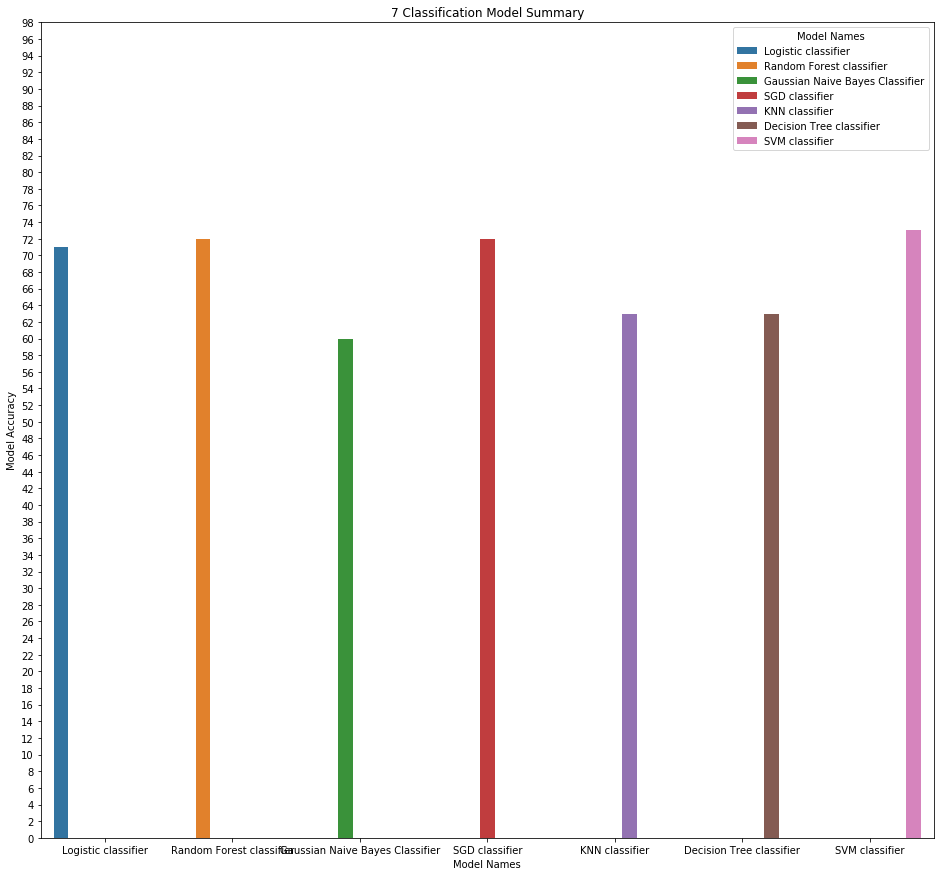

In [136]:
plt.figure(figsize=(16,15))
ax = sns.barplot(x=model_accuracy_table['Model Names'],y=model_accuracy_table['Model Accuracy']
            ,data=model_accuracy_table,hue=model_accuracy_table['Model Names'])
ax.set(title='7 Classification Model Summary')
plt.yticks(np.arange(0,100,2))

# Max accuracy model names and their respective model accuracies

In [137]:
for i in range(len(model_accuracy_table)):
    if (model_accuracy_table["Model Accuracy"][i] >= model_accuracy_table["Model Accuracy"].max()):
        print(model_accuracy_table["Model Names"][i]+" "+str(model_accuracy_table["Model Accuracy"][i])+"% accuracy")

SVM classifier 73% accuracy


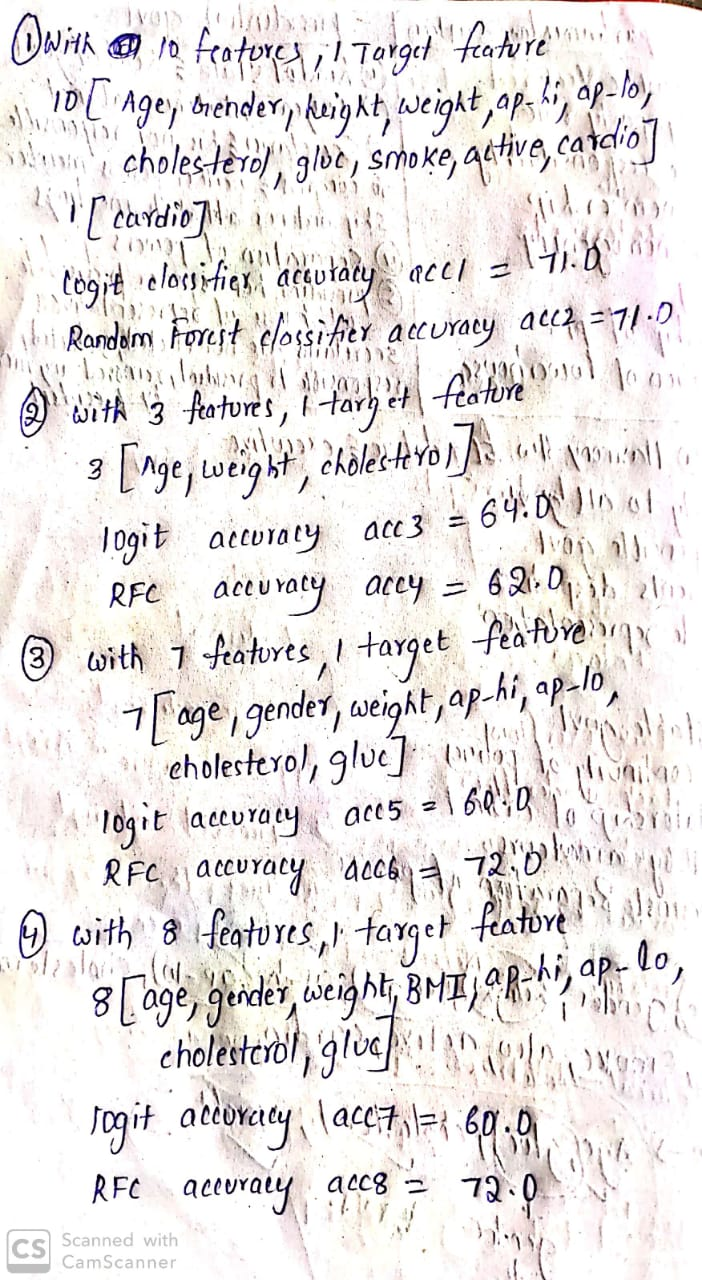

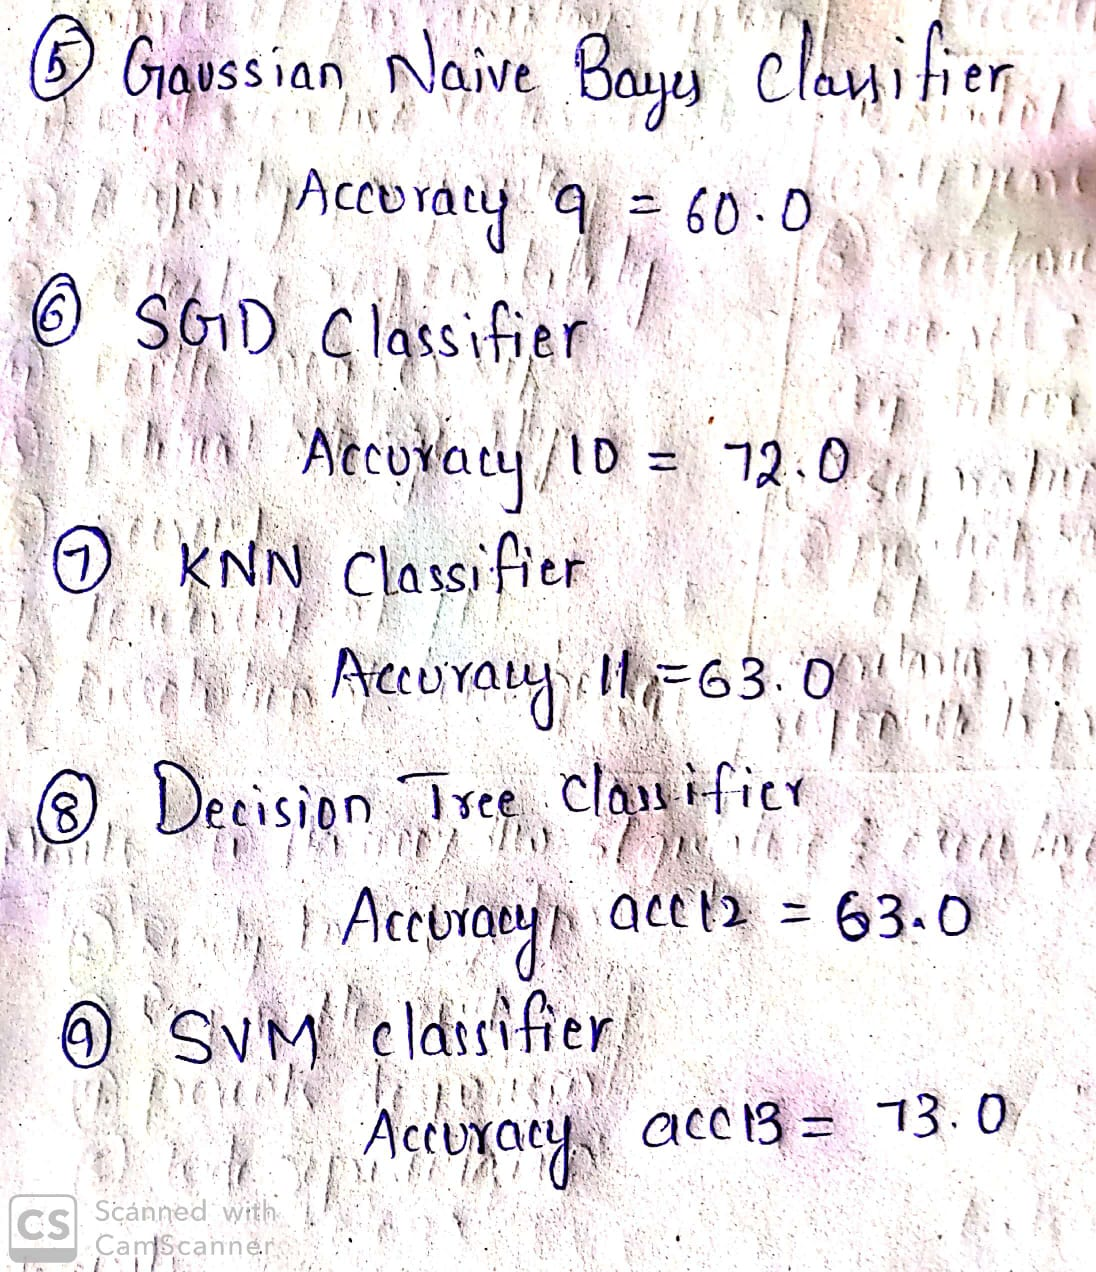